In [1]:
# DON"T FORGET TO REMOVE HUMIDITY OVER 100
# And check against the example notebook

In [ ]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress


# Import keys
from config import w_api_key
from config import gkey

# Import citipy module
# Be sure to be in PythonData where this installed to have this work
from citipy import citipy

In [4]:
# Set range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# List for holding lat_lngs and cities
coordinates = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1400)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1400)
coordinates = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for coord in coordinates:
    city = citipy.nearest_city(coord[0], coord[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

# cities

In [5]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
farenheit = "units=imperial" #imperial
city = cities[2]


# Build query URL
query_url = url + "appid=" + w_api_key + "&q=" + city + "&units=imperial"
# Hooray!  I'm talking to the data source and my call is working.

In [6]:
# Look at sample results to set up directions to pull specific values in for loop
city_data_test = requests.get(query_url).json()
city_data_test

{'coord': {'lon': -73.9662, 'lat': 42.6001},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 21.4,
  'feels_like': 12.24,
  'temp_min': 19.99,
  'temp_max': 21.99,
  'pressure': 1021,
  'humidity': 86},
 'visibility': 10000,
 'wind': {'speed': 7.05, 'deg': 285},
 'clouds': {'all': 2},
 'dt': 1612928439,
 'sys': {'type': 3,
  'id': 2037353,
  'country': 'US',
  'sunrise': 1612872033,
  'sunset': 1612909185},
 'timezone': -18000,
 'id': 5106841,
 'name': 'Albany',
 'cod': 200}

In [187]:
# Set up dataframe to hold data from Open Weather

weather_data = pd.DataFrame({
    "City": cities
})

# Add empty columns to fill
weather_data["Lat"] = ""
weather_data["Long"] = ""
weather_data["Max Temp"] = ""
weather_data["Humidity"] = ""
weather_data["Cloudiness"] = ""
weather_data["Wind Speed"] = ""
weather_data["Country"] = ""
weather_data["Date"] = ""

# weather_data

In [8]:
# Set up a for loop to go through the weather_data dataframe to look for data for each city

base_url = url + "appid=" + w_api_key + "&units=imperial" + "&q=" 

for index, row in weather_data.iterrows():
    
    # Get the city name from the df
    name = row["City"]
    
    # Add city to url
    print(f"Retrieving data for {index}: {name}.")
    response = requests.get(base_url + name).json()
    
#     print(response)
    
    # Extract data
    # Not sure why I did this, but I'm not inclined to undo it after having run all my data already
    # This would not be necessary and I could just use response instead ot results
    results = response
#     print(results["coord"]["lat"])
    
    try:
#         print("Proof of entry into try block")
        weather_data.loc[index, "Lat"] = results["coord"]["lat"]
        weather_data.loc[index, "Long"] = results["coord"]["lon"]
        weather_data.loc[index, "Max Temp"] = results["main"]["temp_max"]
        weather_data.loc[index, "Humidity"] = results["main"]["humidity"]
        weather_data.loc[index, "Cloudiness"] = results["clouds"]["all"]
        weather_data.loc[index, "Wind Speed"] = results["wind"]["speed"]
        weather_data.loc[index, "Country"] = results["sys"]["country"]
        weather_data.loc[index, "Date"] = results["dt"]
        
        print(f"Retrieving results for {name}. Loading stats.")
        
    except KeyError:
        print(f"{name} not found.")
        # Place an NaN to find and remove the rows with no data later
        weather_data.loc[index, "Lat"] = np.nan
        pass
    
    time.sleep(1)


Retrieving data for 0: khatanga.
Retrieving results for khatanga. Loading stats.
Retrieving data for 1: vaini.
Retrieving results for vaini. Loading stats.
Retrieving data for 2: albany.
Retrieving results for albany. Loading stats.
Retrieving data for 3: mataura.
Retrieving results for mataura. Loading stats.
Retrieving data for 4: geraldton.
Retrieving results for geraldton. Loading stats.
Retrieving data for 5: hermanus.
Retrieving results for hermanus. Loading stats.
Retrieving data for 6: lebu.
Retrieving results for lebu. Loading stats.
Retrieving data for 7: ouesso.
Retrieving results for ouesso. Loading stats.
Retrieving data for 8: atuona.
Retrieving results for atuona. Loading stats.
Retrieving data for 9: hithadhoo.
Retrieving results for hithadhoo. Loading stats.
Retrieving data for 10: alice springs.
Retrieving results for alice springs. Loading stats.
Retrieving data for 11: taolanaro.
taolanaro not found.
Retrieving data for 12: oum hadjer.
Retrieving results for oum had

Retrieving data for 103: viedma.
Retrieving results for viedma. Loading stats.
Retrieving data for 104: calama.
Retrieving results for calama. Loading stats.
Retrieving data for 105: agadir.
Retrieving results for agadir. Loading stats.
Retrieving data for 106: mitsamiouli.
Retrieving results for mitsamiouli. Loading stats.
Retrieving data for 107: esperance.
Retrieving results for esperance. Loading stats.
Retrieving data for 108: ridgecrest.
Retrieving results for ridgecrest. Loading stats.
Retrieving data for 109: yamada.
Retrieving results for yamada. Loading stats.
Retrieving data for 110: dikson.
Retrieving results for dikson. Loading stats.
Retrieving data for 111: tasiilaq.
Retrieving results for tasiilaq. Loading stats.
Retrieving data for 112: yomitan.
yomitan not found.
Retrieving data for 113: te anau.
Retrieving results for te anau. Loading stats.
Retrieving data for 114: klaksvik.
Retrieving results for klaksvik. Loading stats.
Retrieving data for 115: sentyabrskiy.
senty

Retrieving data for 204: sahuaripa.
Retrieving results for sahuaripa. Loading stats.
Retrieving data for 205: bako.
Retrieving results for bako. Loading stats.
Retrieving data for 206: yumen.
Retrieving results for yumen. Loading stats.
Retrieving data for 207: pucara.
Retrieving results for pucara. Loading stats.
Retrieving data for 208: shelabolikha.
Retrieving results for shelabolikha. Loading stats.
Retrieving data for 209: katsuura.
Retrieving results for katsuura. Loading stats.
Retrieving data for 210: yerofey pavlovich.
Retrieving results for yerofey pavlovich. Loading stats.
Retrieving data for 211: qaqortoq.
Retrieving results for qaqortoq. Loading stats.
Retrieving data for 212: portland.
Retrieving results for portland. Loading stats.
Retrieving data for 213: privas.
Retrieving results for privas. Loading stats.
Retrieving data for 214: kalmunai.
Retrieving results for kalmunai. Loading stats.
Retrieving data for 215: luderitz.
Retrieving results for luderitz. Loading stats

Retrieving data for 305: cherskiy.
Retrieving results for cherskiy. Loading stats.
Retrieving data for 306: siirt.
Retrieving results for siirt. Loading stats.
Retrieving data for 307: forssa.
Retrieving results for forssa. Loading stats.
Retrieving data for 308: hecun.
Retrieving results for hecun. Loading stats.
Retrieving data for 309: kotka.
Retrieving results for kotka. Loading stats.
Retrieving data for 310: shenjiamen.
Retrieving results for shenjiamen. Loading stats.
Retrieving data for 311: lensk.
Retrieving results for lensk. Loading stats.
Retrieving data for 312: bonthe.
Retrieving results for bonthe. Loading stats.
Retrieving data for 313: paracuru.
Retrieving results for paracuru. Loading stats.
Retrieving data for 314: tamiahua.
Retrieving results for tamiahua. Loading stats.
Retrieving data for 315: faanui.
Retrieving results for faanui. Loading stats.
Retrieving data for 316: aksum.
Retrieving results for aksum. Loading stats.
Retrieving data for 317: mount pleasant.
R

Retrieving data for 408: gravdal.
Retrieving results for gravdal. Loading stats.
Retrieving data for 409: fundacion.
Retrieving results for fundacion. Loading stats.
Retrieving data for 410: scottsbluff.
Retrieving results for scottsbluff. Loading stats.
Retrieving data for 411: thompson.
Retrieving results for thompson. Loading stats.
Retrieving data for 412: qui nhon.
Retrieving results for qui nhon. Loading stats.
Retrieving data for 413: san quintin.
Retrieving results for san quintin. Loading stats.
Retrieving data for 414: flinders.
Retrieving results for flinders. Loading stats.
Retrieving data for 415: kapoeta.
Retrieving results for kapoeta. Loading stats.
Retrieving data for 416: were ilu.
Retrieving results for were ilu. Loading stats.
Retrieving data for 417: broken hill.
Retrieving results for broken hill. Loading stats.
Retrieving data for 418: bargal.
bargal not found.
Retrieving data for 419: atar.
Retrieving results for atar. Loading stats.
Retrieving data for 420: emp

Retrieving data for 511: kimbe.
Retrieving results for kimbe. Loading stats.
Retrieving data for 512: mardan.
Retrieving results for mardan. Loading stats.
Retrieving data for 513: zhanatas.
zhanatas not found.
Retrieving data for 514: monte patria.
Retrieving results for monte patria. Loading stats.
Retrieving data for 515: carman.
Retrieving results for carman. Loading stats.
Retrieving data for 516: blagoyevo.
Retrieving results for blagoyevo. Loading stats.
Retrieving data for 517: saint-pierre.
Retrieving results for saint-pierre. Loading stats.
Retrieving data for 518: tigil.
Retrieving results for tigil. Loading stats.
Retrieving data for 519: kuche.
kuche not found.
Retrieving data for 520: vila franca do campo.
Retrieving results for vila franca do campo. Loading stats.
Retrieving data for 521: porkhov.
Retrieving results for porkhov. Loading stats.
Retrieving data for 522: kiama.
Retrieving results for kiama. Loading stats.
Retrieving data for 523: lompoc.
Retrieving results 

Retrieving data for 613: ji-parana.
ji-parana not found.


In [9]:
weather_data.head(100)

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,khatanga,71.9667,102.5,-13,85,0,8.28,RU,1612928439
1,vaini,-21.2,-175.2,78.8,94,75,17.27,TO,1612928441
2,albany,42.6001,-73.9662,21.99,86,2,7.05,US,1612928439
3,mataura,-46.1927,168.864,50.67,91,100,11.3,NZ,1612928443
4,geraldton,-28.7667,114.6,75.2,53,90,23.02,AU,1612928444
...,...,...,...,...,...,...,...,...,...
95,vao,-22.6667,167.483,78.15,79,11,13.29,NC,1612928545
96,mar del plata,-38.0023,-57.5575,66,88,75,11.5,AR,1612928327
97,kapaa,22.0752,-159.319,71.6,49,40,13.8,US,1612928547
98,mbandaka,0.0487,18.2603,71.08,74,76,3.67,CD,1612928548


In [10]:
weather_data.dropna(inplace=True)
weather_data.reset_index(drop=True, inplace=True)
weather_data

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,khatanga,71.9667,102.5,-13,85,0,8.28,RU,1612928439
1,vaini,-21.2,-175.2,78.8,94,75,17.27,TO,1612928441
2,albany,42.6001,-73.9662,21.99,86,2,7.05,US,1612928439
3,mataura,-46.1927,168.864,50.67,91,100,11.3,NZ,1612928443
4,geraldton,-28.7667,114.6,75.2,53,90,23.02,AU,1612928444
...,...,...,...,...,...,...,...,...,...
547,cortez,37.3489,-108.586,46.4,36,90,6.91,US,1612929116
548,touros,-5.1989,-35.4608,80.6,78,40,6.91,BR,1612929118
549,cockburn town,21.4612,-71.1419,77.07,79,7,21.63,TC,1612928840
550,salym,60.0625,71.4789,-25.08,86,60,5.06,RU,1612929121


In [11]:
# Export weather_data to csv
# Update with full data set later (updated)

weather_data.to_csv("City_Weather_data.csv", index=False)

# Lean charts on csv to avoid rerunning everything to fix small things
weather_data_2 = pd.read_csv("Working_data.csv")
weather_data_2

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,punta arenas,-53.1500,-70.9167,68.00,52,0,11.50,CL,1612819286
1,bredasdorp,-34.5322,20.0403,62.60,88,5,5.75,ZA,1612819481
2,cidreira,-30.1811,-50.2056,74.77,71,0,12.21,BR,1612819184
3,mataura,-46.1927,168.8643,60.39,85,100,2.33,NZ,1612819485
4,ponta do sol,32.6667,-17.1000,57.99,69,24,3.00,PT,1612819390
...,...,...,...,...,...,...,...,...,...
505,camalu,30.8500,-116.0667,64.00,43,0,5.99,MX,1612820091
506,praia da vitoria,38.7333,-27.0667,60.80,77,40,13.00,PT,1612819766
507,kihei,20.7850,-156.4656,77.00,61,40,19.57,US,1612820093
508,constantine,36.3650,6.6147,50.00,76,75,20.71,DZ,1612820094


In [12]:
# Set up scatterplots and linear regressions

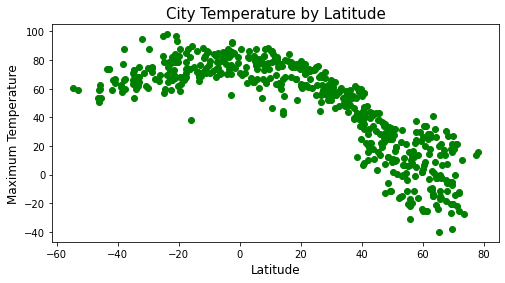

In [164]:
# Temperature vs Latitude
x = weather_data["Lat"]
temp_y = weather_data["Max Temp"]

plt.figure(figsize=(8, 4))

plt.scatter(x, temp_y, color="green")
plt.ylabel("Maximum Temperature", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.title("City Temperature by Latitude", fontsize=15)
# plt.show()

plt.savefig("Images/total_temp.png")

The graph above shows the relationship between global latitude positon and temperature in each of the cities in the dataset. We can see through the shape of the data that city temperatures rise as latitude approaches 0 from -60, but appear to decrease more steeply as they increase from 0.  Temperatures at 60 appear much lower than at -60, indicating there there is more at play than simply latitude or distance from the equator.  This makes sense when taking into account the tilt of the Earth's axis.  The lower temperatures at latitudes further north also make sense given the quantity of land closer to the Arctic Circle and the current winter season in the northern hemisphere.

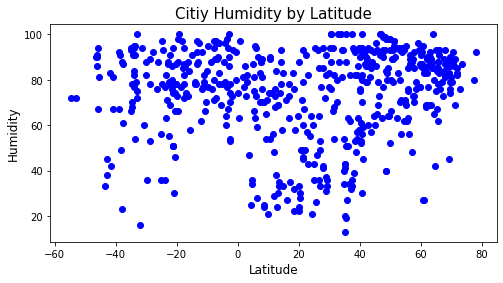

In [165]:
# Humidity vs Latitude
humid_y = weather_data["Humidity"]

plt.figure(figsize=(8, 4))

plt.plot(x, humid_y, "bo")
plt.ylabel("Humidity", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.title("Citiy Humidity by Latitude", fontsize=15)
# plt.show()

plt.savefig("Images/total_humidity.png")

In analyzing the City Humidity vs Latitude graph, while we can see there is a cluster of high humidity cities between 60 and 80 degrees latitude, there is no obvious relationship between latitude and humidity otherwise.  Humidity looks to generally stay above 60% with little striking increase or decrease as latitude changes.  This allows us to infer that latitude is not a good indicator or predicter of humidity.

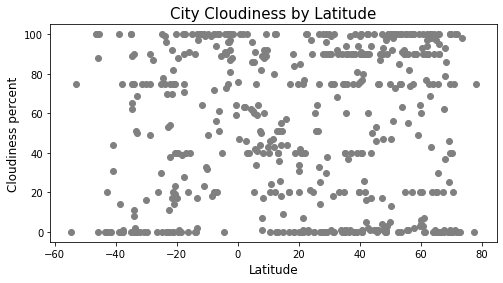

In [166]:
# Cloudiness vs Latitude
cloud_y = weather_data["Cloudiness"]

plt.figure(figsize=(8, 4))

plt.scatter(x, cloud_y, color="gray")
plt.ylabel("Cloudiness percent", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.title("City Cloudiness by Latitude", fontsize=15)
# plt.show()

plt.savefig("Images/total_cloudiness.png")

This is an interesting one, as it shows that there is a clustering of cities with either total cloud cover, or no cloud cover at all, but it appears equally weighted across latitude.  Once again, it does not appear that there is any strong relationship between latitude and cloudiness.  Rather, one might want to infer that it is more likely that a city will have either a cloud-free day or a very cloudy day, but the density of the cities clustered at 0 and 100% cloudiness distract from the higher number of cities that are distributed relatively equally between those extremes.  There do appear to be other clusters at 20%, 40%, and 75% cloud cover, but again, these clusters cross all latitutes, with slightly fewer representative cites around 0.

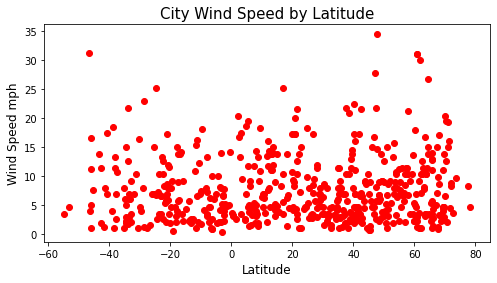

In [167]:
# Wind Speed by Latitude
wind_y = weather_data["Wind Speed"]

plt.figure(figsize=(8, 4))

plt.scatter(x, wind_y, color="red")
plt.ylabel("Wind Speed mph", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.title("City Wind Speed by Latitude", fontsize=15)
# plt.show()

plt.savefig("Images/total_wind.png")

While first glance at City Wind Speed by Latitude looks like a relatively equal distribution of speeds below 20 mph across all latitutes, there does appear to be a higher frequency of cities at higher latitudes, 40 to 60, that have lower wind speeds, with a slightly higher frequency of cities above 60 with higher wind speeds.  This may be more representative of the number of cities pulled at higher latitudes more than a demonstrable relationship between these factors, though.

In [40]:
# Separate df by hemispheres
northern_weather = weather_data_2.loc[weather_data_2["Lat"] >= 0]
northern_weather

southern_weather = weather_data_2.loc[weather_data_2["Lat"] <= 0]
southern_weather

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,punta arenas,-53.1500,-70.9167,68.00,52,0,11.50,CL,1612819286
1,bredasdorp,-34.5322,20.0403,62.60,88,5,5.75,ZA,1612819481
2,cidreira,-30.1811,-50.2056,74.77,71,0,12.21,BR,1612819184
3,mataura,-46.1927,168.8643,60.39,85,100,2.33,NZ,1612819485
8,rikitea,-23.1203,-134.9692,77.13,73,20,9.22,PF,1612819358
...,...,...,...,...,...,...,...,...,...
494,alyangula,-13.8483,136.4192,82.40,83,100,6.91,AU,1612819796
495,puerto narino,-3.7703,-70.3831,77.00,100,75,2.77,CO,1612819813
497,mlonggo,-6.5333,110.7000,75.20,94,40,2.30,ID,1612820081
498,mahebourg,-20.4081,57.7000,78.80,83,75,6.91,MU,1612820082


## Temperature Regressions

The correlation between latitude and temperature in the Southern Hemisphere is 0.55


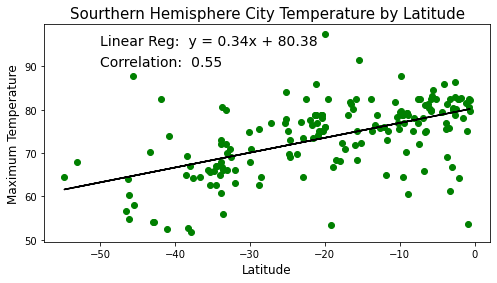

In [168]:
# Let's start with the Southern Hemisphere 

# Southern Temp vs Latitude
south_x = southern_weather["Lat"]
south_temp = southern_weather["Max Temp"]

plt.figure(figsize=(8, 4))

plt.scatter(south_x, south_temp, color="green")

# Calculate the line of best fit and plot on the graph
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_x, south_temp)
regress_values = south_x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Place the line on the graph and annotate
correlation = st.pearsonr(south_x, south_temp)
# Why is this showing so weirdly?
print(f"The correlation between latitude and temperature in the Southern Hemisphere is {round(correlation[0],2)}")

plt.plot(south_x, regress_values, "k-")
plt.annotate(f'Correlation:  {round(rvalue, 2)}', (-50,90), fontsize=14, color="black")
plt.annotate(f'Linear Reg:  {line_eq}', (-50,95), fontsize=14, color="black")
# plt.annotate(line_eq,(-40,285),fontsize=15,color="green")

plt.ylabel("Maximum Temperature", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.title("Sourthern Hemisphere City Temperature by Latitude", fontsize=15)
plt.tight_layout

# plt.show()
plt.savefig("Images/southern_temp.png")

We can see here that the southern hemisphere data represent the portion of the overall data in which there is a gradual increase in city temperature as latitude approaches 0.  The correlation is .55, which is not incredibly strong, but still indicates a useful starting tool to predict temperature in a given city in the southern hemisphere based on its latitude.

The correlation between latitude and temperature in the Northern Hemisphere is -0.87


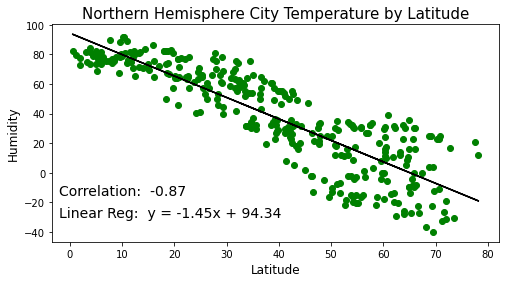

In [169]:
# Northern Temp vs Latitude
north_x = northern_weather["Lat"]
north_temp = northern_weather["Max Temp"]

plt.figure(figsize=(8, 4))

correlation = st.pearsonr(north_x, north_temp)
print(f"The correlation between latitude and temperature in the Northern Hemisphere is {round(correlation[0],2)}")

# Calculate the line of best fit and plot on the graph
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_x, north_temp)
regress_values = north_x * slope + intercept
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(north_x, north_temp, color="green")
plt.plot(north_x, regress_values, "k-")
plt.annotate(f'Correlation:  {round(rvalue, 2)}', (-2,-15), fontsize=14, color="black")
plt.annotate(f'Linear Reg:  {line_eq}', (-2,-30), fontsize=14, color="black")

plt.ylabel("Humidity", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.title("Northern Hemisphere City Temperature by Latitude", fontsize=15)

# plt.show()
plt.savefig("Images/northern_temp.png")

As we observed in the overall data, city temperature does increase as latitude approaches 0.  For southern cities, we observed this as a positive correlation and it is not surprising to see a similar, strong negative correlation here.  The further away from the equator, the colder the city temperature.

## Humidity Regression

The correlation between latitude and humidity in the Southern Hemisphere is 0.23


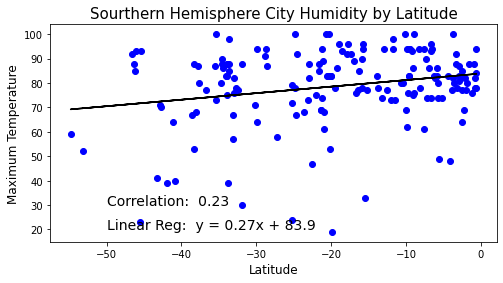

In [170]:
# Southern Humidity vs Latitude
south_x = southern_weather["Lat"]
south_humid = southern_weather["Humidity"]

plt.figure(figsize=(8, 4))

plt.scatter(south_x, south_humid, color="blue")

# Calculate the line of best fit and plot on the graph
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_x, south_humid)
regress_values = south_x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Place the line on the graph and annotate
correlation = st.pearsonr(south_x, south_humid)
# Why is this showing so weirdly?
print(f"The correlation between latitude and humidity in the Southern Hemisphere is {round(correlation[0],2)}")

plt.plot(south_x, regress_values, "k-")
plt.annotate(f'Correlation:  {round(rvalue, 2)}', (-50,30), fontsize=14, color="black")
plt.annotate(f'Linear Reg:  {line_eq}', (-50,20), fontsize=14, color="black")

plt.ylabel("Maximum Temperature", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.title("Sourthern Hemisphere City Humidity by Latitude", fontsize=15)

# plt.show()
plt.savefig("Images/southern_humidity.png")

While we can see that humidity in cities in the southern hemisphere generally have humidty rates over 60%, we can also see that the correlation is only 0.23, which is not terribly strong.  It is interesting to note that there is an increase in number of cities as latitude approaches 0, which may also be a factor in influencing the correlation between latitude and humidity.

The correlation between latitude and humidity in the Northern Hemisphere is 0.28


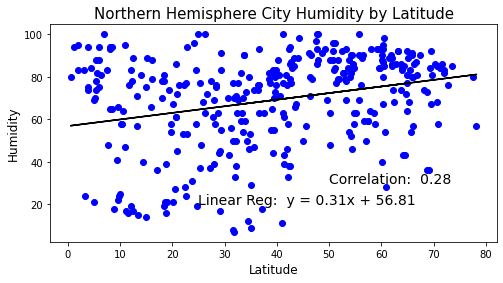

In [171]:
# Northern Humidity vs Latitude
north_x = northern_weather["Lat"]
north_humid = northern_weather["Humidity"]

plt.figure(figsize=(8, 4))

plt.scatter(north_x, north_humid, color="blue")

# Calculate the line of best fit and plot on the graph
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_x, north_humid)
regress_values = north_x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Place the line on the graph and annotate
correlation = st.pearsonr(north_x, north_humid)
# Why is this showing so weirdly?
print(f"The correlation between latitude and humidity in the Northern Hemisphere is {round(correlation[0],2)}")

plt.plot(north_x, regress_values, "k-")
plt.annotate(f'Correlation:  {round(rvalue, 2)}', (50,30), fontsize=14, color="black")
plt.annotate(f'Linear Reg:  {line_eq}', (25,20), fontsize=14, color="black")

plt.ylabel("Humidity", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.title("Northern Hemisphere City Humidity by Latitude", fontsize=15)

# plt.show()
plt.savefig("Images/northern_humidity.png")

Once again, we are seeing a weak correlation between city latitude and humidity.  With a correlation of 0.28, there is a small increase in humidty as latitude increased from 0, but it is not strong enough to serve as a good predictive tool.

## Cloudiness Regressions

The correlation between latitude and cloudiness in the Southern Hemisphere is 0.35


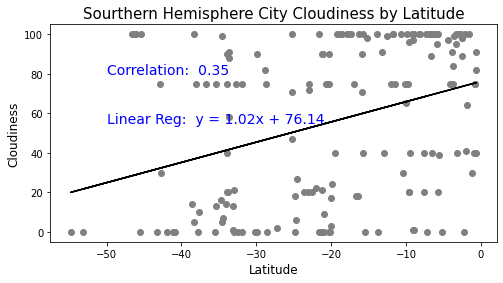

In [172]:
# Southern cloudiness vs Latitude
south_x = southern_weather["Lat"]
south_cloud = southern_weather["Cloudiness"]

plt.figure(figsize=(8, 4))

plt.scatter(south_x, south_cloud, color="gray")

# Calculate the line of best fit and plot on the graph
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_x, south_cloud)
regress_values = south_x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Place the line on the graph and annotate
correlation = st.pearsonr(south_x, south_cloud)
# Why is this showing so weirdly?
print(f"The correlation between latitude and cloudiness in the Southern Hemisphere is {round(correlation[0],2)}")

plt.plot(south_x, regress_values, "k-")
plt.annotate(f'Correlation:  {round(rvalue, 2)}', (-50,80), fontsize=14, color="blue")
plt.annotate(f'Linear Reg:  {line_eq}', (-50,55), fontsize=14, color="blue")

plt.ylabel("Cloudiness", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.title("Sourthern Hemisphere City Cloudiness by Latitude", fontsize=15)

# plt.show()
plt.savefig("Images/southern_cloudiness.png")

Much like the overall data, we can see that there are clusters of cities at 0%, 40%, 80%, and 100% cloudiness, with fewer cities reporting cloudiness levels between those four points.  The distribution of cities across latitudes appears fairly even at each of those points, but once again we see that a higher quantity of cities closer to a latitude of 0 may be impacting the correlation.  At 0.35, there is a correlation, but not a particularly strong one, which means that southern latitude is still not a great predictor of cloudiness of a given city.

The correlation between latitude and cloudiness in the Northern Hemisphere is 0.15


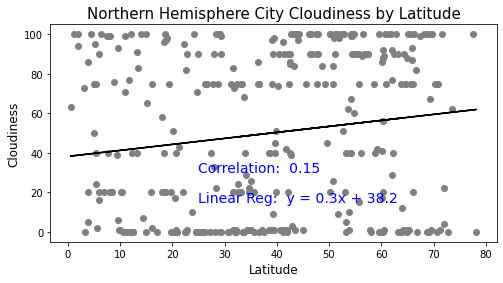

In [173]:
# Northern Cloudiness vs Latitude
north_x = northern_weather["Lat"]
north_cloud = northern_weather["Cloudiness"]

plt.figure(figsize=(8, 4))

plt.scatter(north_x, north_cloud, color="gray")

# Calculate the line of best fit and plot on the graph
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_x, north_cloud)
regress_values = north_x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Place the line on the graph and annotate
correlation = st.pearsonr(north_x, north_cloud)
# Why is this showing so weirdly?
print(f"The correlation between latitude and cloudiness in the Northern Hemisphere is {round(correlation[0],2)}")

plt.plot(north_x, regress_values, "k-")
plt.annotate(f'Correlation:  {round(rvalue, 2)}', (25,30), fontsize=14, color="blue")
plt.annotate(f'Linear Reg:  {line_eq}', (25,15), fontsize=14, color="blue")

plt.ylabel("Cloudiness", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.title("Northern Hemisphere City Cloudiness by Latitude", fontsize=15)

# plt.show()
plt.savefig("Images/northern_cloudiness.png")

In the northern hemisphere, we are seeing an even weaker correlation between latitude and cloudiness.  As we can infer from the dispersal of data points on the scatterplot, latitude is not a good predictor of cloudiness in a given city in the northern hemisphere.

## Wind Speed Regressions

The correlation between latitude and wind speed in the Southern Hemisphere is -0.15


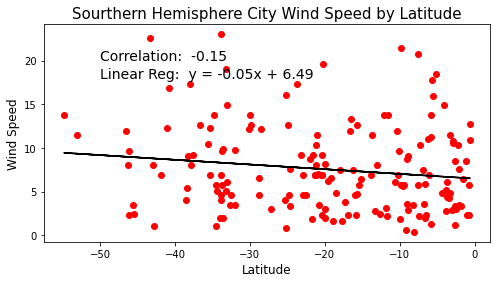

In [174]:
# Southern Wind Speed vs Latitude
south_x = southern_weather["Lat"]
south_wind = southern_weather["Wind Speed"]

plt.figure(figsize=(8, 4))

plt.scatter(south_x, south_wind, color="red")

# Calculate the line of best fit and plot on the graph
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_x, south_wind)
regress_values = south_x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Place the line on the graph and annotate
correlation = st.pearsonr(south_x, south_wind)
# Why is this showing so weirdly?
print(f"The correlation between latitude and wind speed in the Southern Hemisphere is {round(correlation[0],2)}")

plt.plot(south_x, regress_values, "k-")
plt.annotate(f'Correlation:  {round(rvalue, 2)}', (-50,20), fontsize=14, color="black")
plt.annotate(f'Linear Reg:  {line_eq}', (-50,18), fontsize=14, color="black")

plt.ylabel("Wind Speed", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.title("Sourthern Hemisphere City Wind Speed by Latitude", fontsize=15)

# plt.show()
plt.savefig("Images/southern_wind.png")

As we observed in the overall data, there does not appear to be a strong relationship between city latitude and wind speed.  A correlation of -0.15 upholds that observation, that latitude south of 0 is not a good predictor of wind speed in a given city.

The correlation between latitude and wind speed in the Northern Hemisphere is 0.12


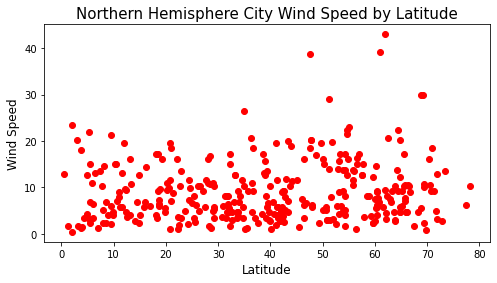

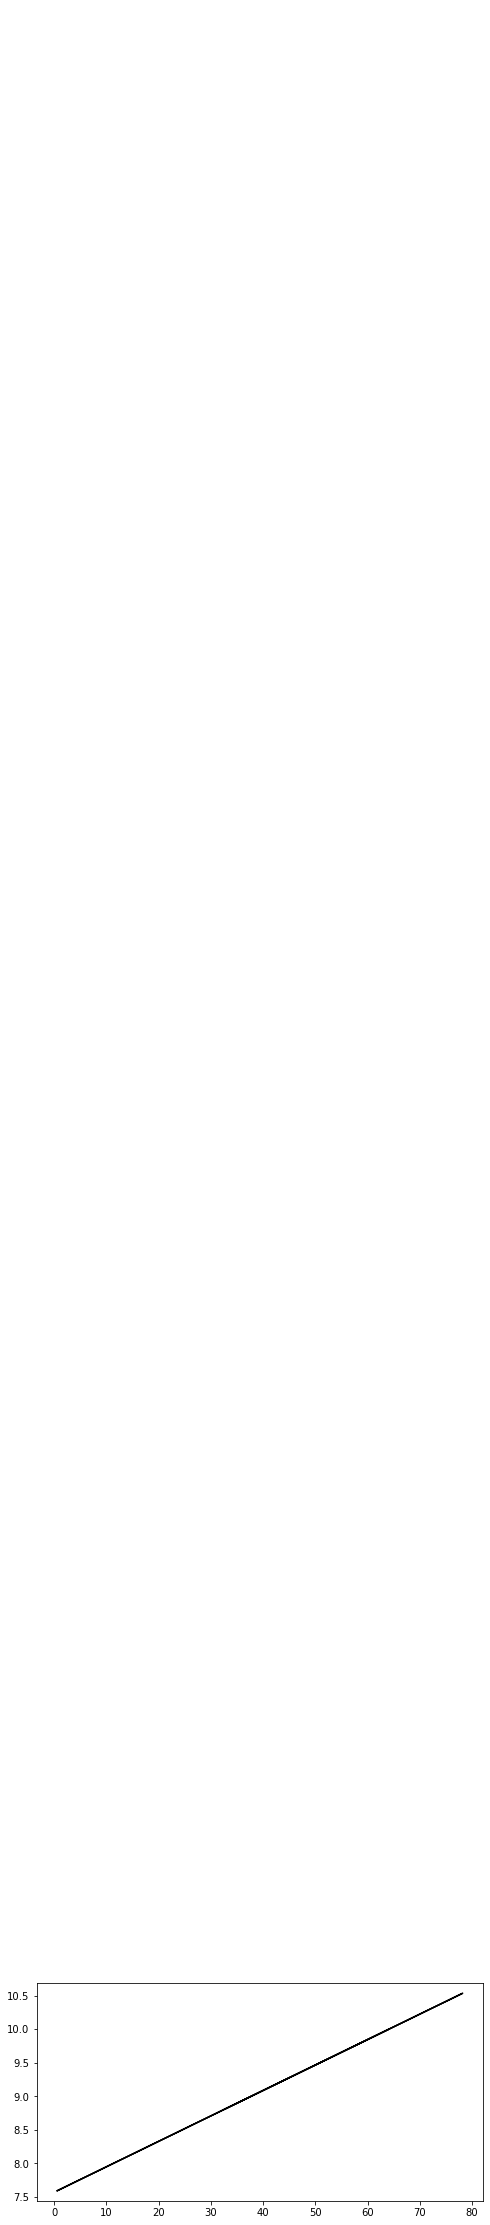

In [182]:
# Northern Wind Speed vs Latitude
#trying again
north_x = northern_weather["Lat"]
north_wind = northern_weather["Wind Speed"]

plt.figure(figsize=(8, 4))

plt.scatter(north_x, north_wind, color="red")
plt.ylabel("Wind Speed", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.title("Northern Hemisphere City Wind Speed by Latitude", fontsize=15)

# Calculate the line of best fit and plot on the graph
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_x, north_wind)
regress_values = north_x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Place the line on the graph and annotate
correlation = st.pearsonr(north_x, north_wind)
# Why is this showing so weirdly?
print(f"The correlation between latitude and wind speed in the Northern Hemisphere is {round(correlation[0],2)}")

plt.figure(figsize=(8, 4))

plt.plot(north_x, regress_values, "k-")
plt.annotate(f'Correlation:  {round(rvalue, 2)}', (10,40), fontsize=14, color="black")
plt.annotate(f'Linear Reg:  {line_eq}', (10,35), fontsize=14, color="black")


# plt.show()
plt.savefig("Images/northern_wind.png")

Although the display of cities in the northern hemisphere by latitude and wind speed looks remarkably different from that of cities in the southern hemisphere, the correlation between latitude and wind speed is similarly weak.  This means that it is not a good predictive tool for wind speed in northern cities either.